In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base= automap_base()
# reflect the tables
base.prepare(engine,reflect=True)

/var/folders/vd/r058js812ld0xgwzbqh1j9c00000gn/T/ipykernel_4277/4064628884.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  base.prepare(engine,reflect=True)


In [6]:
# View all of the classes that automap found
base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
measurements=base.classes.measurement
station= base.classes.station 

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date=session.query(measurements.date).order_by(measurements.date.desc()).first()
recent_date

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago= dt.date(2017,8,23)-dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores
year_precip= session.query(measurements.date,measurements.prcp).\
    filter(measurements.date >= one_year_ago, measurements.prcp !=None).\
    order_by(measurements.date).all()


In [12]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
precip_df= pd.DataFrame(year_precip, columns=['Date','Precipitation'])
precip_df.set_index('Date',inplace=True)
precip_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


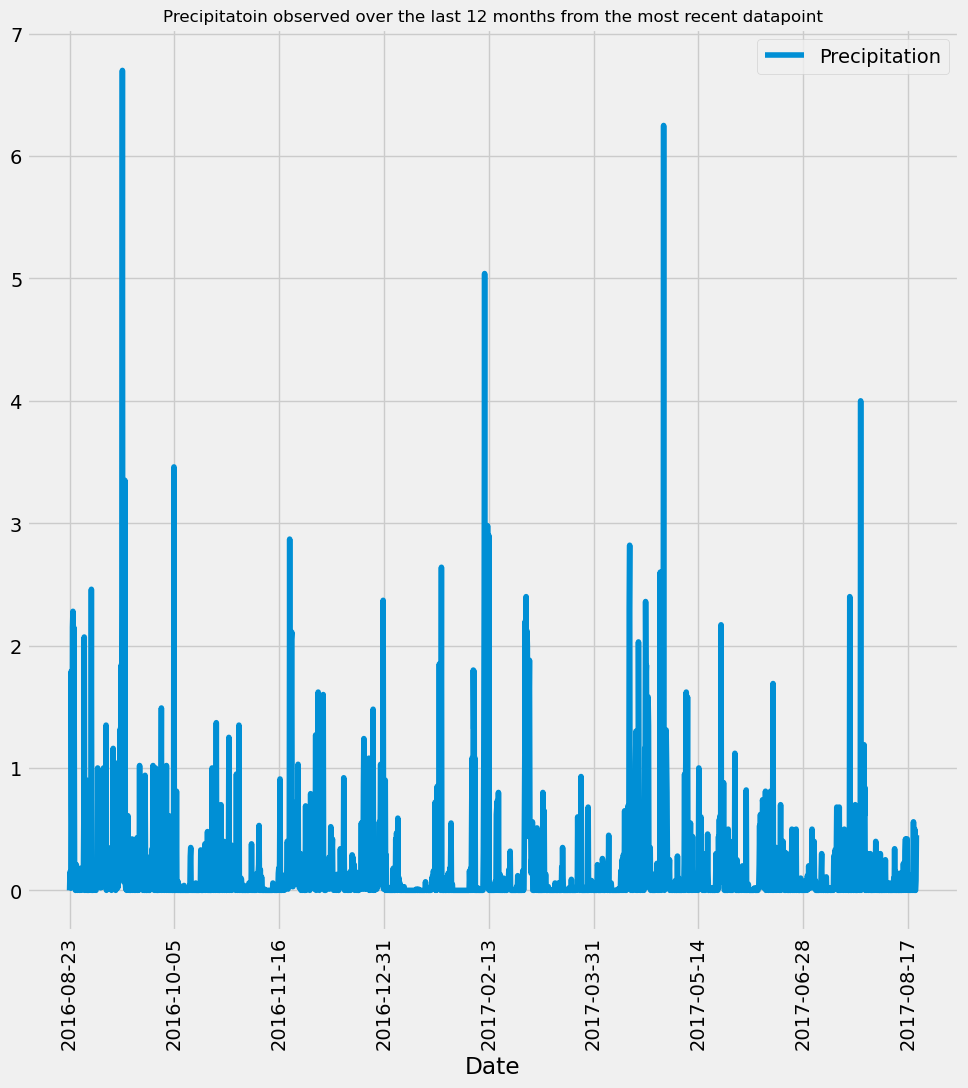

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(figsize=(10,10))
plt.tight_layout()
plt.xticks(rotation=90)
plt.title("Precipitatoin observed over the last 12 months from the most recent datapoint",
          size=12)
plt.savefig('Images/Precipitation.png',bbox_inches="tight")

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurements.station).distinct().count()

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations=session.query(measurements.station,func.count(measurements.station)).\
                            group_by(measurements.station).\
                            order_by(func.count(measurements.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results=session.query(func.min(measurements.tobs),func.max(measurements.tobs),func.avg(measurements.tobs)).\
                filter(measurements.station == 'USC00519281').order_by(func.min(measurements.tobs)).all()
results

[(54.0, 85.0, 71.66378066378067)]

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
last_year_temp= session.query(measurements.tobs).\
                filter(measurements.date >= one_year_ago, measurements.station == 'USC00519281').\
                order_by(measurements.tobs).all()


In [19]:
#plot the results as a histogram
last_year_df= pd.DataFrame(last_year_temp,columns=['tobs'])
last_year_df


,tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0
...,...
347,81.0
348,82.0
349,82.0
350,82.0


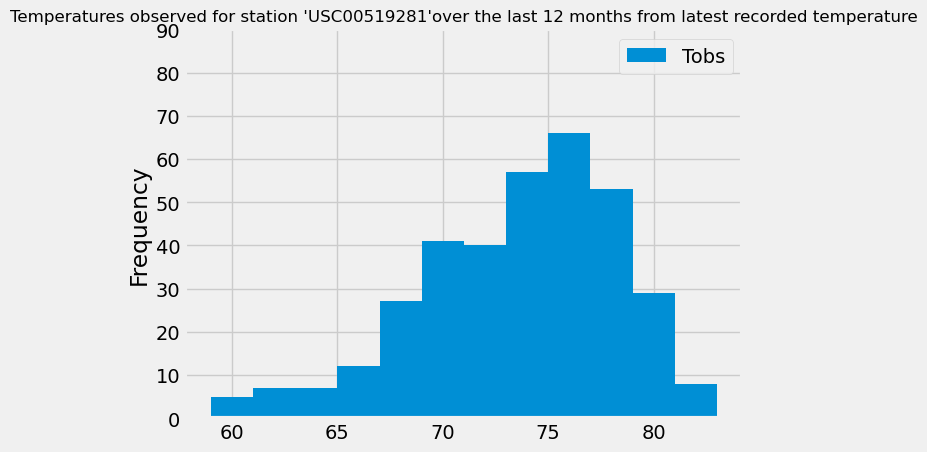

In [20]:
last_year_df.hist(bins = 12)

plt.ylabel("Frequency")
plt.title("Temperatures observed for station 'USC00519281'over the last 12 months from latest recorded temperature",
          size=12)
labels= ["Tobs"]
plt.legend(labels)
plt.ylim(0,90)
plt.savefig('Images/station-histogram.png',bbox_inches="tight")


# Close Session

In [21]:
# Close Session
session.close()